# Application de TensorFlow pour le jeu de données CIFAR-10

## Qu'est-ce que le jeu de données CIFAR-10 ?

Le jeu de données **CIFAR-10** est un ensemble standard pour les tâches de classification d'images dans le domaine du deep learning. Il contient :

- **Images :** 60 000 images en couleur de taille 32x32 pixels, réparties en 10 classes.
- **Classes :** Les catégories incluent des objets courants comme des avions, des voitures, des chats, des chiens, etc.
- **Structure :**
  - 50 000 images pour l'entraînement.
  - 10 000 images pour le test.

CIFAR-10 est un défi intéressant car les images sont petites et complexes, avec des caractéristiques visuelles qui se chevauchent.

---

## Pourquoi utiliser TensorFlow ?

**TensorFlow** est une bibliothèque idéale pour travailler sur CIFAR-10 en raison de ses fonctionnalités avancées :

1. **Modèles de convolution :** Conception facile de réseaux de neurones convolutifs (CNN), particulièrement adaptés aux images.
2. **Optimisation GPU/TPU :** Entraînement rapide même sur de grands ensembles de données.
3. **Facilité d'utilisation :** API intuitive avec Keras.

Dans ce projet, nous construirons un CNN pour classer les images de CIFAR-10.

---

## Étapes du projet

1. **Chargement des données CIFAR-10 :**
   - Téléchargement des données depuis TensorFlow.
   - Prétraitement des images pour normaliser les pixels.

2. **Construction du modèle CNN :**
   - Création d'un réseau convolutif avec des couches telles que :
     - Convolution.
     - Pooling.
     - Couches denses.

3. **Entraînement :**
   - Entraînement du modèle sur les 50 000 images d'entraînement.
   - Utilisation de l'optimiseur Adam pour minimiser la perte.

4. **Évaluation :**
   - Évaluation du modèle sur les 10 000 images de test.
   - Calcul de la précision et de la matrice de confusion.

5. **Visualisation :**
   - Affichage des résultats, des prédictions et des performances.

---




Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5382 - accuracy: 0.4385 - val_loss: 1.3189 - val_accuracy: 0.5288
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1771 - accuracy: 0.5831 - val_loss: 1.1462 - val_accuracy: 0.5937
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0289 - accuracy: 0.6403 - val_loss: 1.0213 - val_accuracy: 0.6425
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9354 - accuracy: 0.6721 - val_loss: 0.9760 - val_accuracy: 0.6646
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8552 - accuracy: 0.7000 - val_loss: 0.9417 - val_accuracy: 0.6631
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7961 - accuracy: 0.7237 - val_loss: 0.9270 - val_accuracy: 0.6825
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7452 - accuracy: 0.7371 - val_loss: 0.8578 -

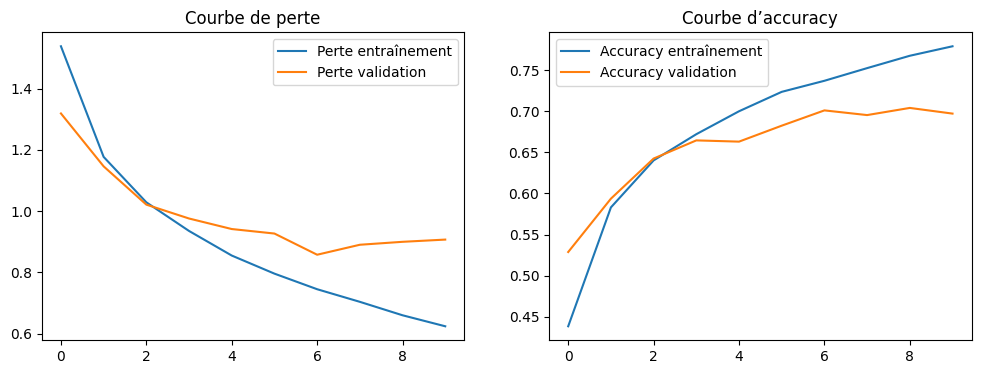

313/313 [==============================] - 1s 3ms/step


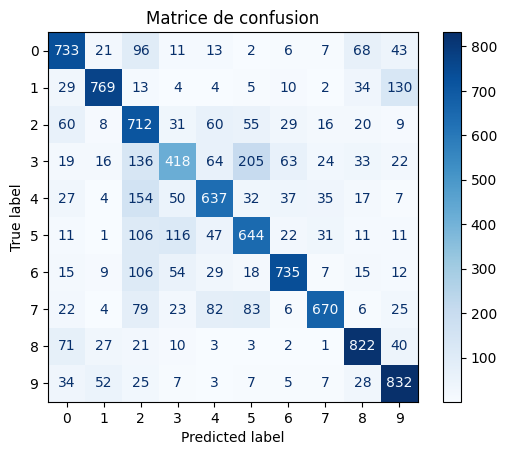

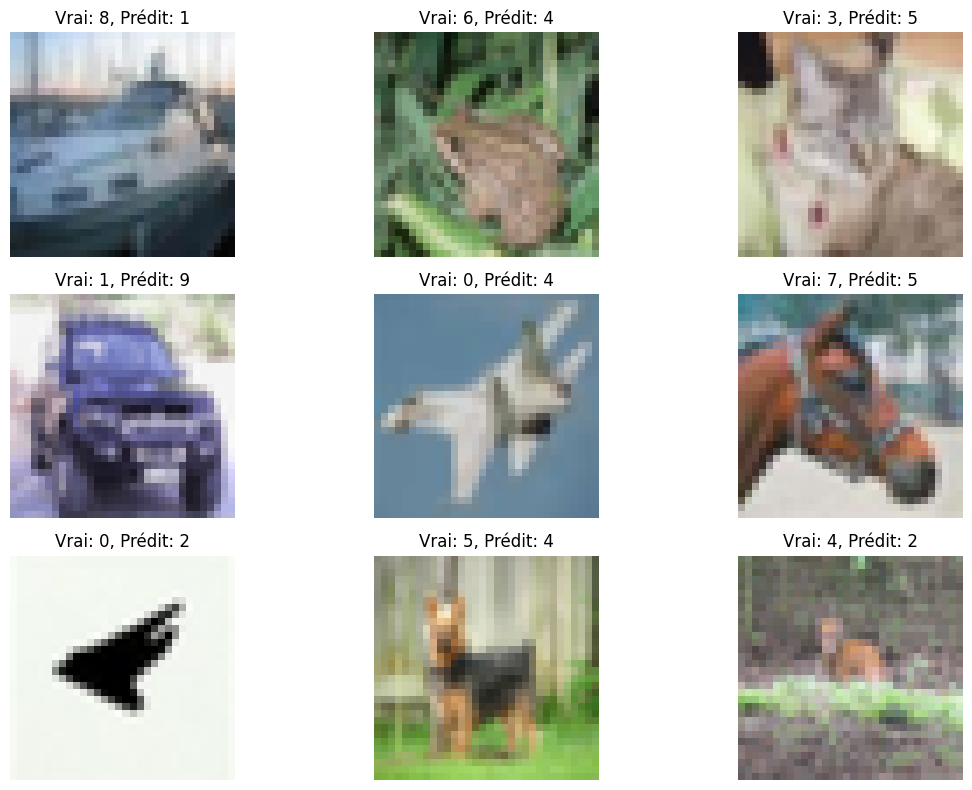

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#--loading de la data--
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#--Normalisation des pixels (0-255 -> 0-1)--
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#--Encodage des labels (one-hot encoding)--
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# --CNN--
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#--testing--
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Précision sur le test : {test_acc:.2f}")

#--Courbes de perte et d'accuracy--
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.legend()
plt.title('Courbe de perte')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.legend()
plt.title('Courbe d’accuracy')
plt.show()

#--Matrice de confusion--

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=list(range(10)))
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

# Affichage des erreurs
errors = np.where(y_pred != y_true)[0]
plt.figure(figsize=(12, 8))
for i, error_idx in enumerate(errors[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[error_idx])
    plt.title(f"Vrai: {y_true[error_idx]}, Prédit: {y_pred[error_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Les derniers images correspondent aux erreurs.

# Correspondance des classes CIFAR-10

Dans le dataset CIFAR-10, chaque numéro de classe correspond à une catégorie spécifique :

| **Numéro** | **Classe**     |
|------------|----------------|
| 0          | Avion          |
| 1          | Automobile     |
| 2          | Oiseau         |
| 3          | Chat           |
| 4          | Cerf           |
| 5          | Chien          |
| 6          | Grenouille     |
| 7          | Cheval         |
| 8          | Bateau         |
| 9          | Camion         |

---
# Projet : Détection de Tumeurs Cérébrales sur IRM avec CNN et Inception

Dans le cadre du cours **Apprentissage Statistique**, j'ai travaillé sur un projet visant à détecter automatiquement des tumeurs cérébrales sur des IRM en utilisant des réseaux de neurones convolutifs (CNN), y compris l'architecture **Inception**.

### Objectifs du projet
- **Détecter automatiquement les tumeurs cérébrales** à partir d'IRM.
- **Comparer les performances** de différents modèles CNN, notamment **Inception**, pour choisir l'architecture la plus efficace.

### Méthodologie
- **Prétraitement des données :** Normalisation, redimensionnement et augmentation des images.
- **Entraînement des modèles :** Utilisation de CNN classiques et d'Inception pour capturer des caractéristiques multi-échelle.
- **Évaluation :** Analyse des performances avec des métriques telles que la précision et l'AUC (Area Under Curve).

### Présentation
Une démonstration en classe pourra être réalisée pour expliquer les résultats et montrer l'efficacité des modèles. Le code source et les résultats détaillés sont accessibles sur GitHub.

[Consulter le projet sur GitHub](https://github.com/Lilyakhelid/Brain_tumor)
